## Load Data

In [40]:
!pip install python-dateutil


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [252]:
import pandas as pd
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import datetime as date
import dateutil
folder = "DATA"
path = os.path.join(folder, "*.csv")
all_CSVs = glob.glob(path)
#print(path)
#print(all_CSVs)
#load all dfs an merge to one

def load_df():
    df_meta = []
    all_channel_names = []
    df_meta = pd.DataFrame(df_meta)
    for csv in all_CSVs: 
        filename = os.path.basename(csv)
        if filename[-13:] == "automated.csv":
            channelName = filename.replace(filename[-14:], "")
            df = pd.read_csv(csv)
            df["Channel"]= channelName
            index = [i for i in range(len(df))]
            df.set_index([index, 'Channel'], inplace= True)
            frames = [df_meta, df]
            df_meta = pd.concat(frames)
            if channelName not in all_channel_names:
                all_channel_names.append(channelName)
    return df_meta, all_channel_names
[df_meta, all_channel_names] = load_df()

Wahrheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Wahrheit verpflichtet"]
Schöpfer = df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
Alles = df_meta.loc[df_meta.index.get_level_values("Channel") == "ALLESUNDNICHTS"]
Drachentöter = df_meta.loc[df_meta.index.get_level_values("Channel") == "DRACHENTÖTER TV"]
Freiheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Weg in deine Freiheit"]
Rettung = df_meta.loc[df_meta.index.get_level_values("Channel") == 'Rettung der Menschheit TV']
UBC = df_meta.loc[df_meta.index.get_level_values("Channel") == 'UBC TV']
VeitClub = df_meta.loc[df_meta.index.get_level_values("Channel") == 'VEIT CLUB']
df_collection = [Wahrheit, Schöpfer, Alles, Drachentöter, Freiheit, Rettung, UBC, VeitClub]


## UTILS

In [7]:
#get only one channel
df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
#print(df_meta.loc["title", "Chronische Dummheit - Die Lösung für die Genesung"])


## Compare Channels Time

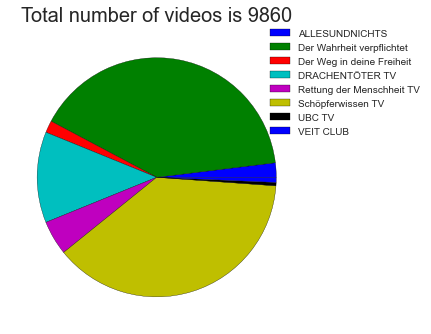

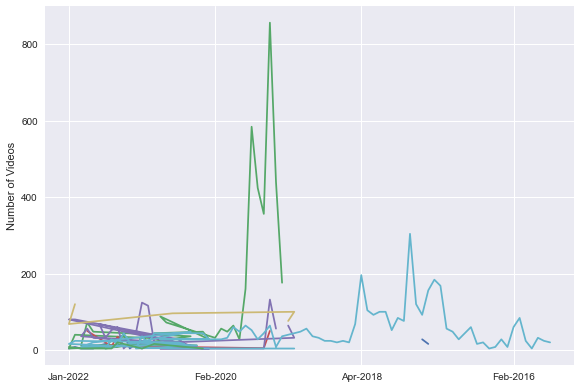

In [72]:


Title = "Total number of videos is "+ str(len(df_meta))  
#TO ADD letztes Upload              
number_of_vids =[]
for name in all_channel_names:
    number_of_vids.append(len(df_meta.loc[df_meta.index.get_level_values("Channel") == name]));
cumsum = np.cumsum(number_of_vids)
explode = [0.1]*8
              

colors = ['b','g','r','c', 'm','y', 'k']

Title = "Total number of videos is "+ str(len(df_meta)) 
fi1, ax1 = plt.subplots(nrows=1, ncols =1)
fi2, ax2 = plt.subplots(nrows=1, ncols =1)
#ax1.title(Title)
ax1.set_title(Title, loc="center",fontsize=20)
ax1.pie(number_of_vids, radius=1, wedgeprops={ "edgecolor": "black"}, textprops={'fontsize': 11}, colors= colors )
ax1.legend(all_channel_names, bbox_to_anchor=(0.85,1.025), loc="upper left")

for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    ax2.plot(df.groupby(pd.to_datetime(df["publish_date"]).dt.strftime('%b-%Y'), sort=False
              )["title"].size())
#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
#ax2.plot()
plt.style.use("seaborn")
plt.tight_layout()
plt.xticks([0,24,48,73])
plt.ylabel("Number of Videos")
plt.show()

[1762, 1770, 1774, 1774, 1780, 1785, 1785, 1789, 1794, 1794, 1794]
[72, 72, 78, 79, 104, 119, 121, 130, 130, 131, 135, 135, 135, 136, 137, 149, 152, 154, 155, 156, 157, 167, 172, 189, 196, 199, 206, 214, 218, 237, 247, 247, 253, 255, 255, 256, 256, 257, 258, 259, 260, 260, 261, 262, 263, 263, 263, 264, 265, 265, 265, 265, 276, 276, 276, 276, 276, 276, 294, 300, 303, 303, 303, 303, 303, 303, 303, 303, 374, 393, 393, 393, 396, 402, 408, 413, 421, 422, 422, 423, 438, 444, 444, 445, 445, 445, 449, 449, 453, 454, 455, 463, 474, 487, 488, 495, 500, 501, 512, 522, 524, 546, 567, 577, 577, 580, 580, 587, 589, 592, 592, 595, 602, 603, 607, 608, 617, 629, 631, 635, 635, 635, 638, 638, 638, 641, 657, 657, 662, 662, 663, 664, 666, 671, 675, 675, 678, 678, 685, 689, 693, 695, 708, 709, 709, 709, 718, 724, 725, 727, 728, 731, 732, 735, 736, 736, 737, 739, 739, 740, 740, 742, 743, 744, 744, 745, 746, 749, 750, 751, 751, 752, 754, 754, 755, 757, 758, 758, 761, 761, 761, 761, 763, 764, 770, 775, 775, 7

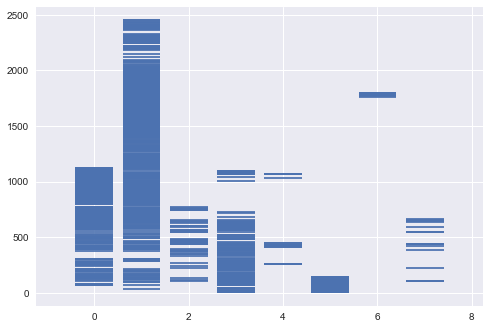

In [255]:
from datetime import datetime
[df, all_channels] = load_df()

list_of_date =[]
list_of_list = []
now = datetime.now()
for df in df_collection:
    for p_date in df["publish_date"]:
        dt = datetime.strptime(p_date, '%Y-%m-%d')
        diff  = now - dt 
        list_of_date.append(diff.days)
        #print(type(diff.days))
    list_of_list.append(list_of_date)
    list_of_date = []

#display(list_of_list)
# make data:
#date.datetime.strptime(my_date_string, '%b %d %Y %I:%M%p')
for list in list_of_list:
    print(list)
    print("BUB")
x = [2, 4, 6, 8, 10, 12, 14, 16]
D= list_of_list
# plot:
fig, axx = plt.subplots()

axx.eventplot(D, orientation="vertical",  linelengths = 0.8 )

#axx.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 3000))

plt.show()

## Woher kommen die Videos?

In [118]:
df_meta = load_df()
df_drop = df_meta.drop('Der Wahrheit verpflichtet', level=1)
count = 0
list_titles = []
for title in Wahrheit["title"]: 
    #print(title)
    for titleS in df_drop["title"]:
        if title == titleS:
            count += 1
            list_titles.append(title)
            #print("doppletes Video %s" %title)            
display("Show same video titles: %s" %list_titles)

"Show same video titles: ['Das unmögliche, möglich machen', 'Das Licht dieser Welt']"

Videos on other channels with same length: 1826
Number of other Videos: 1464
10:16:01
['ALLESUNDNICHTS', 'Der Wahrheit verpflichtet', 'Der Weg in deine Freiheit', 'DRACHENTÖTER TV', 'Rettung der Menschheit TV', 'Schöpferwissen TV', 'UBC TV', 'VEIT CLUB']


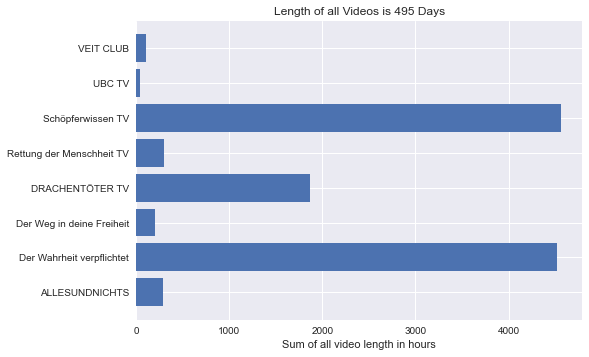

In [189]:
counter_len = 0
[df_meta, all_channel_names] = load_df()
for length in Wahrheit["length"]:
    for lengthS in df_drop["length"]:
        if length == lengthS:
            counter_len += 1
print("Videos on other channels with same length: %s" %counter_len)
print("Number of other Videos: %s" % df_drop.shape[0])



print(len_Wahr_h)
duration=0
list_of_length = []
print(all_channel_names)
for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    secs = int(df["length"].sum(axis = 0, skipna = True))
    hours = secs/360
    days= hours/24
    list_of_length.append(hours)
    duration = duration + hours/24

    
plt.barh(all_channel_names, list_of_length)


duration = duration
title = duration
plt.title("Length of all Videos is %s Days" % round(title))
plt.xlabel("Sum of all video length in hours")
plt.ylabel("")
plt.show()
#print(list_of_length)
#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
#ax2.plot()




## Views over all Views over time views

In [195]:
[df, all_channels] = load_df()
#display(df)


,,publish_date,id,title,description,keywords,length,views,age_restricted,yt_caption_info,yt_caption_tracks,vid_info,Unnamed: 0
,Channel,,,,,,,,,,,,
0,ALLESUNDNICHTS,2022-01-01,hQl3oP9TL40,"Ach wie gut das Niemand weiß, das Niemand etwa...",lat. Nemo = Niemand lat. \nCorona = ZUschauerk...,[],2648,23,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtYMXRiM...,0.0,NaN
1,ALLESUNDNICHTS,2021-12-27,t2d_JUB0mc4,#Halo liebe ZUSCHAUER! ..wann werden die ZUsch...,"Du wirst verarscht, glaubst aber gleichzeitig ...",[],214,25,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtGTUtte...,0.0,NaN
2,ALLESUNDNICHTS,2021-12-08,20UHOyzVkog,HALO-Lichteffekt = CORONA = Erhöhung der Intel...,Intelligenz=Dummheit=Glaube=auf den Menschen a...,[],2414,29,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtGbWUyc...,0.0,NaN
3,ALLESUNDNICHTS,2021-09-11,lV2f0G_9-3M,LÜGE TÖTET - WAHRHEIT ENTFESSELT DAS WAHRE EWI...,NaN,[],1239,45,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtpbXNpS...,0.0,NaN
4,ALLESUNDNICHTS,2021-08-21,62Td5dbhl-M,ENDZEIT - WAS WAREN WIR BEREIT ZU TUN - WAS HA...,NaN,['Jesus'],5273,48,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'Cgt4eTBZY...,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,VEIT CLUB,2020-07-25,XGYKNscVcbg,Dein Weg ins Wissen: Nicht DENKEN! WISSEN! Sag...,Das Wissen darum wer der Mensch in Wahrheit is...,"['Veit Club', 'Denken', 'Reden', 'Sprache', 'S...",951,40,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'Cgs3YktPU...,0.0,NaN
13,VEIT CLUB,2020-07-19,aKZYQYN2-PM,Dein Weg ins Wissen: Nimm keine Informationen ...,"Der Kampf gegen das was du glaubst zu sein, de...","['Veit Club', 'Kampf', 'Krieg']",842,30,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtMb2NTM...,0.0,NaN
14,VEIT CLUB,2020-07-15,avK6FvHbfZI,Dein Weg ins Wissen: Nicht Aufgeben ! Erinnere...,NaN,"['Veit Club', 'Korruption', 'Dämonisch']",6161,26,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtOZXpvW...,0.0,NaN


OSError: '_mpl-gallery' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles